# Imports

In [2]:
from IPython.display import display
from PIL import Image

# Load source image

In [3]:
source = Image.open('landscape.jpg')
source = source.convert('L')

# Quantize to black and white

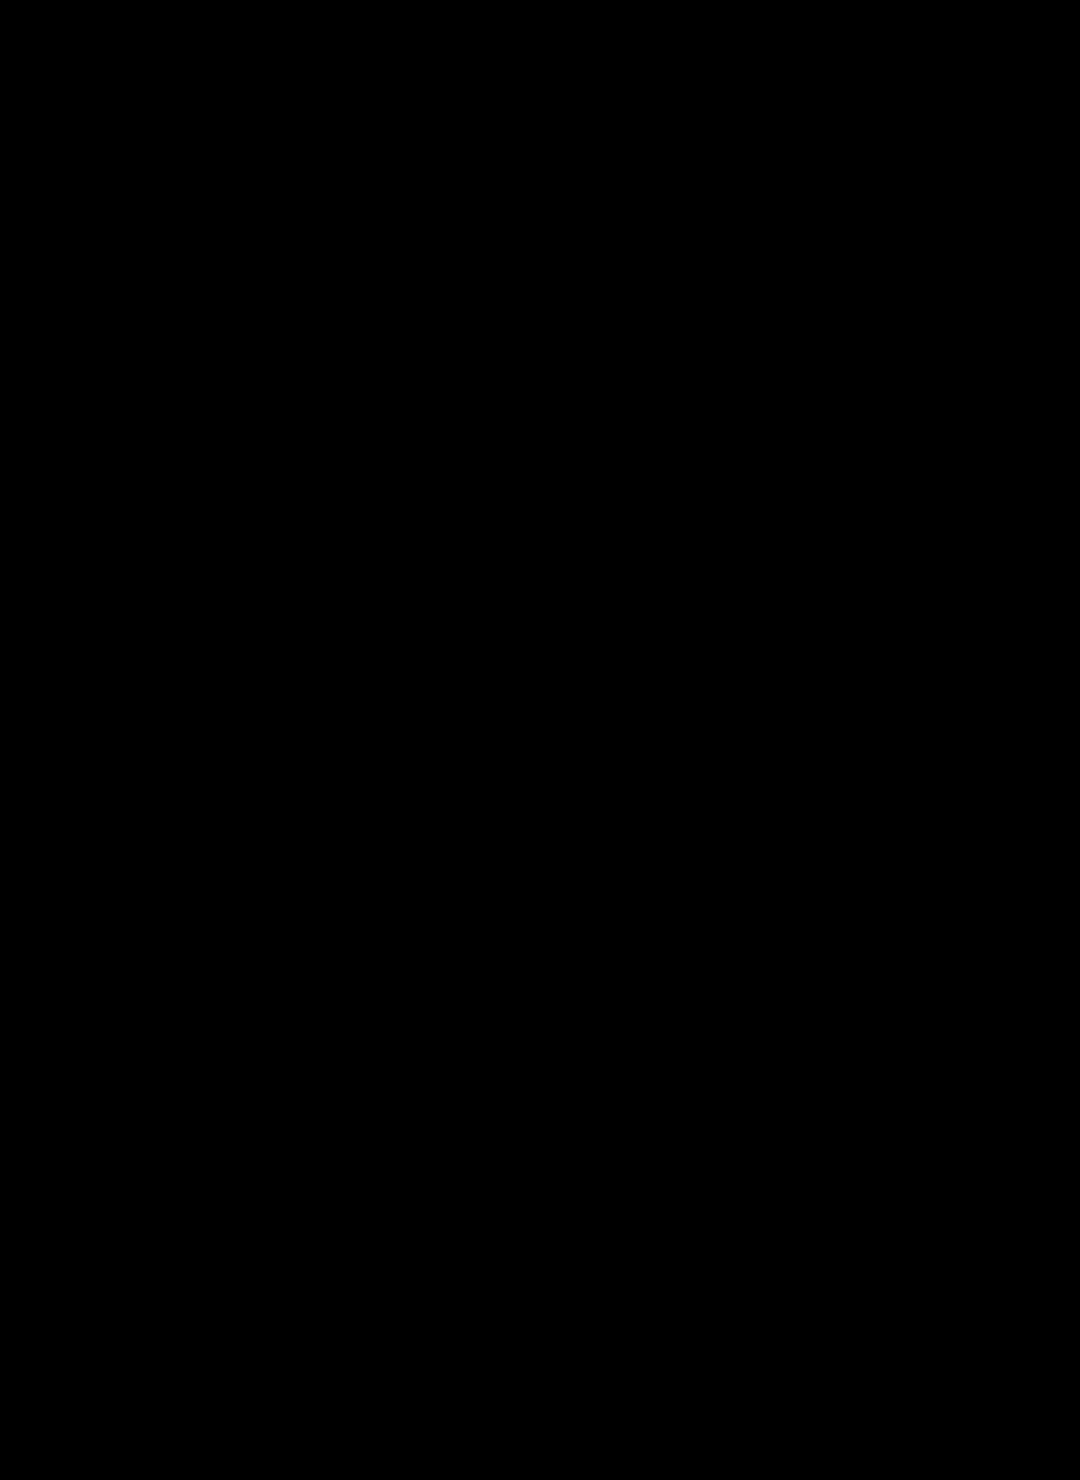

In [6]:
from itertools import product

def luma_srgb_to_linear(l):
    """l: a single luma value in srgb space."""

    # Converting the source image from sRGB to linear space
    # https://entropymine.com/imageworsener/srgbformula/
    s = l / 255
    if s < 0.04045:
        return int(255 * s / 12.92)
    else:
        return int(255 * ((s + 0.055) / 1.055) ** 2.4)

quantized = Image.new('L', source.size)

for coord in product(range(source.size[0]), range(source.size[1])):
    l = luma_srgb_to_linear(source.getpixel(coord))

    # Quantize the image
    if l < 128:
        quantized.putpixel(coord, 0)
    else:
        quantized.putpixel(coord, 255)

display(quantized)